##  파산한 은행 데이타집합에서 분기별 은행수를 계산하기


    1. 먼저 데이타 구조를 파악하기

    2. 'Closing Date' 날짜 항목을 datetime 오브젝트로 변기하기

    3. 'Closing Date' 날짜 정보에서 dt 접근자를 이용하여 연도(year)와 분기(quarter)를 구하기

    4.  연도별 파산은행 수 구하기

    5. 연도별, 분기별 파산은행 수 구하기

    6. 정보 시각화
    
    
    [도서] Do it 데이타분석을 위한 판다스 입문

In [87]:
import pandas as pd

banks = pd.read_csv('./data/banklist.csv')

# (1) 먼저 데이타 구조를 파악하기
#banks.info()
#banks.head()

# (2) Closing Date를 datetime 오브젝트로 변경
banks['C_date'] = pd.to_datetime(banks['Closing Date'])

# (3) 날짜 정보에서 dt 접근자를 이용하여 연도(year)와 분기(quarter)를 구한다
def get_year(a):
    return a.year
def get_quarter(a):
    return a.quarter

banks['year'] = banks['C_date'].apply(get_year)
banks['quarter'] = banks['C_date'].apply(get_quarter)

# (4) 연도별 파산은행 수 구하기
cnt_year=banks.groupby('year').size()
print(cnt_year)


# (5) 연도별, 분기별 파산은행 수 구하기
cnt_year_quarter=pd.crosstab(banks['year'],banks['quarter'])
cnt_year_quarter

year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


quarter,1,2,3,4
year,,,,
2000,0,0,0,2
2001,1,1,2,0
2002,6,2,1,2
2003,1,1,0,1
2004,3,1,0,0
2007,1,0,1,1
2008,2,2,9,12
2009,21,24,50,45
2010,41,45,41,30


Text(0, 0.5, '파산은행수')

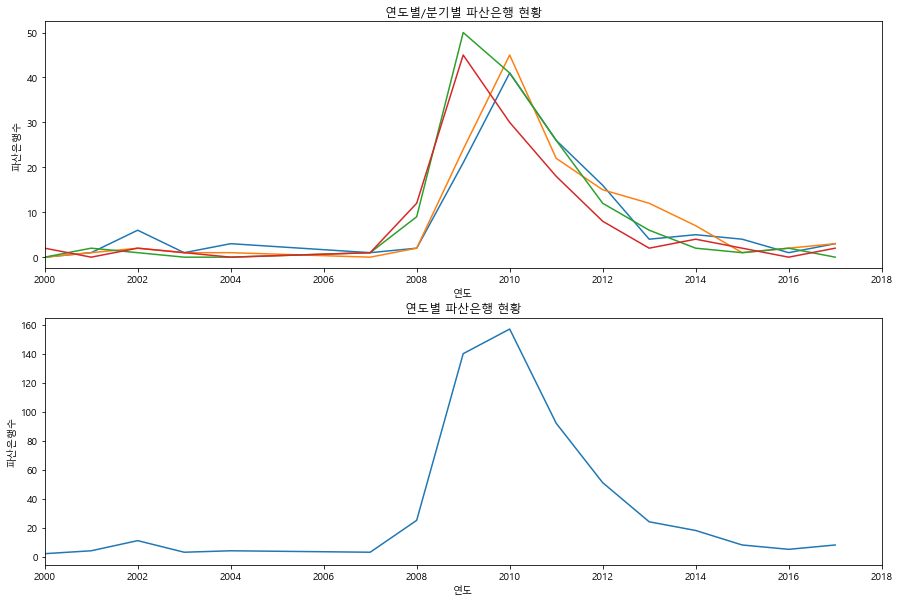

In [86]:
""" 결과를 시각화 ( 간단하게 )"""
%matplotlib inline
import pandas as pd
import matplotlib as mpl     #matplotlib을 이용해 그래프를 그릴 수 있는 pyplot (인터페이스 역할)
import matplotlib.pyplot as plt
import seaborn as sns

#한글처리
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus']=False  # 추가설정 : 폰트를 변경하면 -표시가 ㅁ으로 변경되기에 '-'를 변경하지 않도록 지정
rc('font', family='Malgun Gothic')

fig,ax = plt.subplots(2,1,figsize=(15,10))
ax[0].plot(cnt_year_quarter)
ax[0].set_xlim([2000,2018])
ax[0].set_title('연도별/분기별 파산은행 현황')
ax[0].set_xlabel('연도')
ax[0].set_ylabel('파산은행수')

ax[1].plot(cnt_year)
ax[1].set_title('연도별 파산은행 현황')
ax[1].set_xlim([2000,2018])
ax[1].set_xlabel('연도')
ax[1].set_ylabel('파산은행수')